## PCA

Principal component analysis is an unsupervised method that has multiple uses:

* Dimensionality reduction
* Data compression
* Feature extraction

PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space (principal subspace). The projection minimizes the distances between the original points and their projections on the lower dimensional linear space.

### Algorithm

Input: $X$ - $d$-dimensional input dataset ($ \in  M_{n \times d}$), $m$ (optional) - dimensionality of the output dataset

1.   Compute the mean of each feature on the whole dataset

\begin{equation}
\bar{x}^j = \frac{1}{n} \sum_{i \le n} x_{i}^j
\end{equation}

2.   Subtract the means from the dataset

\begin{equation}
\bar{X}^j =  X^j - \bar{x}^j
\end{equation}

3.   Compute the covariance matrix on the centered dataset
[see](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) `np.cov(...)`

\begin{equation}
cov(X, Y) = \frac{1}{n - 1} \sum_{i = 1}^{n} (X_i - \bar{x})(Y_i - \bar{y})
\end{equation}

4.   Compute eigenvalues and eigenvectors
[see](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) `np.linalg.eig(...)`

5.   If M is not defined - compute the optimal number of output dimensions so than dataset variance is preserved 
6.   Sort the eigenvalues and select the eigenvectors corresponding to the M largest eigenvalues - obtaining matrix $W \in M_{d \times m}$
7.   Project $d$-dimensional dataset into the $m$-dimensional principal subspace by multiplying it with matrix $W$.
[see](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) `np.dot(...)`

\begin{equation}
X' = XW
\end{equation}

Output: $X' \in M_{n \times m}$ dataset, $m$ < $d$

### Imports

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns; sns.set(style='white')

from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

### Utility plotting functions

In [0]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_true=None, mode=None, norm_bounds=False):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'

    plt.grid()
    if y_true == None:
        y_true = np.zeros((len(X_r)), dtype=np.int)
    for ix, iyt in zip(X_r, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyt], 
                    marker=MARKERS[0])
    if norm_bounds:
        ax = plt.gca()
        ax.set_xbound(X.min(), X.max())
        ax.set_ybound(X.min(), X.max())

    plt.show()

def plot3d(X, y_true=None, mode=None, norm_bounds=False):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    if y_true == None:
        y_true = np.zeros((len(X_r)), dtype=np.int)
    for ix, iyt in zip(X_r, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyt], 
                    marker=MARKERS[0])

    if norm_bounds:
        ax.set_xbound(X.min(), X.max())
        ax.set_ybound(X.min(), X.max())
        ax.set_zbound(X.min(), X.max())

    plt.show()

### Implementation

Let's generate a random noise dataset

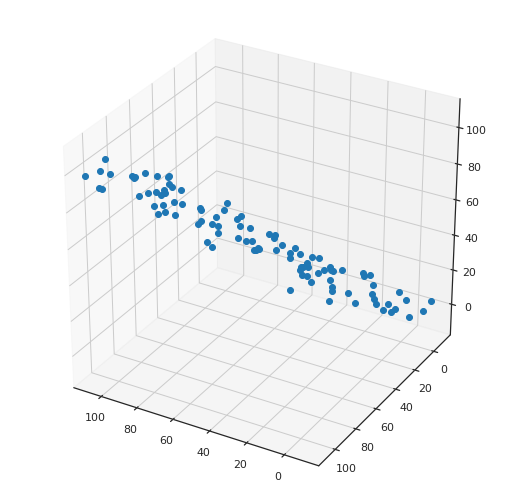

In [4]:
X_noise = np.zeros((100, 3))

X_noise[:, 0] = np.linspace(0, 100, 100) + np.random.normal(0., 8., (100))
X_noise[:, 1] = np.linspace(0, 100, 100) + np.random.normal(0., 8., (100))
X_noise[:, 2] = np.linspace(0, 100, 100)

plot3d(X_noise, norm_bounds=True)

##### 1. Calculate mean for each feature and subtract it from the data

##### 2. Calculate the covariance matrix on the centered dataset

##### 3. Calculate eigenvalues and eigenvectors

Plotting variance based on eigenvalues 


In [0]:
significance = [np.abs(i)/np.sum(values) for i in values]

plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

##### 4. Select eigenvectors coresponding to the biggest eigenvalues

##### 5. Apply the projection on the initial dataset and plot the resulted dataset

Let's do the same using `sklearn.decomposition.PCA`

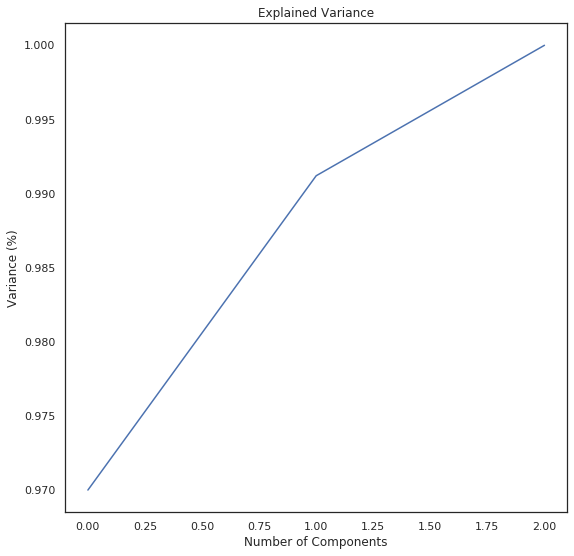

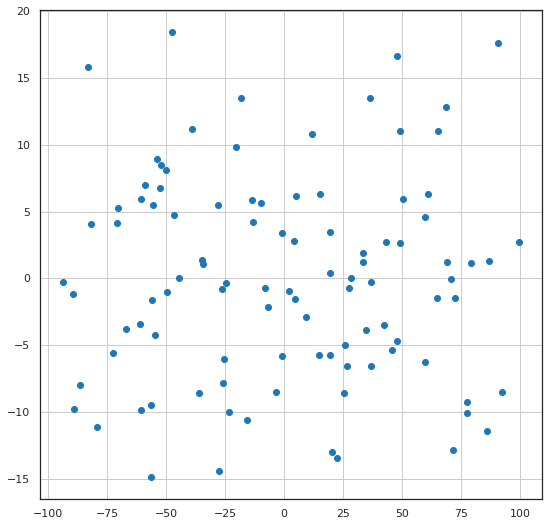

[518.07753237  76.6088754 ]
[[-0.59976578 -0.57427436 -0.55721627]
 [ 0.68656206 -0.72699873  0.01026586]]


In [5]:
pca = PCA()

pca.fit(X_noise)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

pca = PCA(n_components=2)

pca.fit(X_noise)

X_noise_pca = pca.transform(X_noise)

plot2d(X_noise_pca)

print(pca.singular_values_)
print(pca.components_)

#### Data compression using PCA

##### Load data

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X.shape

(1797, 64)

##### Plot a training example

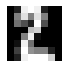

In [7]:
plt.figure(figsize = (1, 1))
plt.axis('off')
plt.imshow(X[333].reshape((8, 8)), cmap='gray')

##### Approximate the number of components so that the dataset variance is preserved

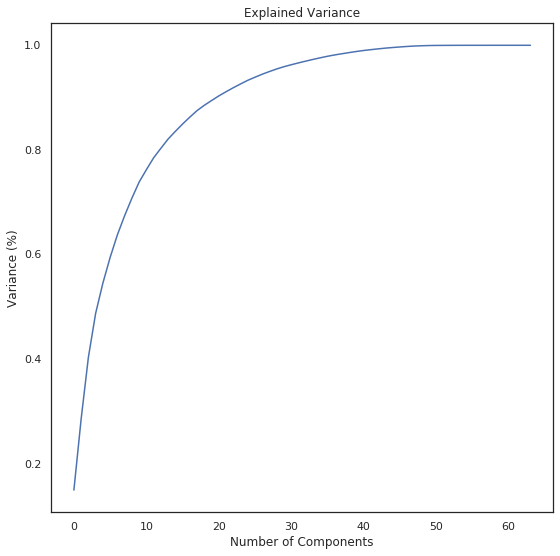

In [8]:
pca = PCA()

pca.fit(X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

##### Project data into the smaller-dimensionality principal subspace, bring it back and plot it.

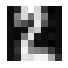

In [9]:
pca = PCA(n_components=36)

pca.fit(X)

X_small = pca.transform(X)

plt.figure(figsize = (1, 1))
plt.axis('off')
plt.imshow(pca.inverse_transform(X_small[333]).reshape((8, 8)), cmap='gray')

##### 6. Apply PCA with `n_components=[3, 5, 7, 9]` on the Wine dataset and print the mean squared error between the original dataset and the dataset after the compression with PCA.

In [10]:
from sklearn.metrics import mean_squared_error
X = datasets.load_wine().data
print(X.shape)

(178, 13)
